In [7]:
import torch 
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
import os

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [9]:
class LeNet_5(nn.Module):
    def __init__(self) -> None:
        super(LeNet_5,self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1,6,5,stride=1,padding=2),
            nn.MaxPool2d(2,2),
            nn.ReLU(),
            nn.Conv2d(6,16,5,1),
            nn.MaxPool2d(2,2),
            nn.ReLU(),
            nn.Conv2d(16,120,5,1),     
        )

        self.fc = nn.Sequential(
            nn.Linear(120,84),
            nn.ReLU(),
            nn.Linear(84,10), 
        )

    def forward(self,input):
        x = self.conv(input)
        x = torch.flatten(x,1)
        x = self.fc(x)
        x = nn.Softmax(dim=1)(x)
        return x

In [17]:
test_data = MNIST(root='./test',train=False,download=False,transform=transforms.ToTensor())

# Umständlich with dataloader
#test_loader = torch.utils.data.DataLoader(test_data,batch_size=1)

img,label = test_data[0]

In [11]:
model = LeNet_5()
model.load_state_dict(torch.load('LeNet_5_state_dict.pth'))
model.to(device)

'\nimage = transforms.ToTensor()(img).to(device)\n#image = image.unsqueeze(0)\nprint(image.size())\n'

In [ ]:
"""
for dataloader approch
model.eval()

with torch.no_grad():
    for X, y in test_loader:
        fig, ax = plt.subplots(squeeze=False)
        img = torch.squeeze(X,0)
        img = torch.squeeze(img,0)
        ax[0,0].imshow(img)
        # (1, 1, 28, 28)
        X = X.to(device)
        pred = model(X)
        print(f"predicted: {pred.argmax(1).item()}\nactual:{y.item()}")
        break
"""    

predicted: 7
actual:7


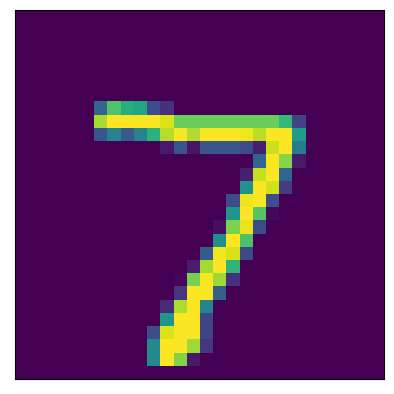

In [21]:
model.eval()

with torch.no_grad():
    X = torch.unsqueeze(img,0).to(device)

    pred = model(X)
    print(f"predicted: {pred.argmax(1).item()}\nactual:{label}")
    fig, ax = plt.subplots(squeeze=False)
    show_instance = torch.squeeze(img,0)
    ax[0,0].imshow(show_instance)
    _ = ax[0,0].set(xticklabels=[],yticklabels=[],xticks=[],yticks=[])